# ANALISIS DEL INDICE DE HURTO EN LA CIUDAD DE MEDELLIN AÑO 2003-2020


El objetivo de este notebook es analizar las cifras otorgadas por la ciudad de Medellin en la cantidad de hurtos a vehiculos registrados desde el año 2003 al 2020, aca podras encontrar diferentes analisis desde la exploracion de los datos para determinar los barrios donde se produjo más robos, modalidad, lugares, etc. 

Aca les dejo el link de donde se extrajeron los datos [aquí](http://medata.gov.co/dataset/hurto-de-carro/resource/97631298-3966-43e5-bd2d-d4d3cef5f544#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},currentView:!grid,graphOptions:{hooks:{processOffset:{},bindEvents:{}}}})

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [2]:
data= pd.read_csv("hurto_de_carro.csv",error_bad_lines=False,delimiter=";")

In [3]:
data.dtypes

seguridad.fecha_hecho             object
seguridad.cantidad               float64
seguridad.latitud                float64
seguridad.longitud               float64
seguridad.sexo                    object
seguridad.edad                     int64
seguridad.estado_civil            object
seguridad.grupo_actor             object
seguridad.actividad_delictiva     object
seguridad.parentesco              object
seguridad.ocupacion               object
seguridad.discapacidad            object
seguridad.grupo_especial          object
seguridad.medio_transporte        object
seguridad.nivel_academico         object
seguridad.testigo                 object
seguridad.conducta                object
seguridad.modalidad               object
seguridad.caracterizacion         object
seguridad.conducta_especial       object
seguridad.arma_medio              object
seguridad.articulo_penal          object
seguridad.categoria_penal         object
seguridad.nombre_barrio           object
seguridad.codigo

In [4]:
data.head()

,seguridad.fecha_hecho,seguridad.cantidad,seguridad.latitud,seguridad.longitud,seguridad.sexo,seguridad.edad,seguridad.estado_civil,seguridad.grupo_actor,seguridad.actividad_delictiva,seguridad.parentesco,...,seguridad.codigo_comuna,seguridad.lugar,seguridad.sede_receptora,seguridad.bien,seguridad.categoria_bien,seguridad.grupo_bien,seguridad.modelo,seguridad.color,seguridad.permiso,seguridad.unidad_medida
0,2017-01-02 17:30:00,1.0,6.251426,-75.570280,Hombre,47,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,10,Vía pública,Candelaria,Camioneta,Camionetas,Vehículo,1986,Negro,Sin dato,Sin dato
1,2017-01-02 18:00:00,1.0,6.274359,-75.578320,Hombre,49,Casado(a),Sin dato,Sin dato,Sin dato,...,5,Parqueadero,Castilla,Camioneta,Camionetas,Vehículo,2005,Blanco,Sin dato,Sin dato
2,2017-01-02 15:30:00,1.0,6.283381,-75.580012,Hombre,54,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,7,Vía pública,Castilla,Automóvil,Automóvil,Vehículo,2012,Gris,Sin dato,Sin dato
3,2017-01-03 00:15:00,1.0,6.246295,-75.552469,Mujer,38,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,8,Vía pública,Villa Hermosa,Automóvil,Automóvil,Vehículo,1996,Verde,Sin dato,Sin dato
4,2017-01-03 15:00:00,1.0,6.262067,-75.570167,Hombre,60,Divorciado(a),Sin dato,Sin dato,Sin dato,...,10,Vía pública,Candelaria,Automóvil,Automóvil,Vehículo,1994,Naranja,Sin dato,Sin dato


### LUGARES MAS ROBADOS

In [5]:
lugar= data.groupby("seguridad.lugar").sum()

In [6]:
lugar.head()

,seguridad.cantidad,seguridad.latitud,seguridad.longitud,seguridad.edad,seguridad.modelo
seguridad.lugar,,,,,
Aeropuerto,2.0,12.535536,-151.121282,78,3977
Almacén tienda y otro,140.0,712.071649,-8615.956406,5504,257817
Banco,6.0,31.178889,-377.941443,259,11955
Bar o cantina,15.0,68.612207,-831.353525,484,30038
Biblioteca,2.0,12.511338,-151.155138,136,3986


In [7]:
ml= lugar["seguridad.cantidad"]>4000

In [8]:
lugmr= lugar[ml].sort_values(by="seguridad.cantidad",ascending=False)

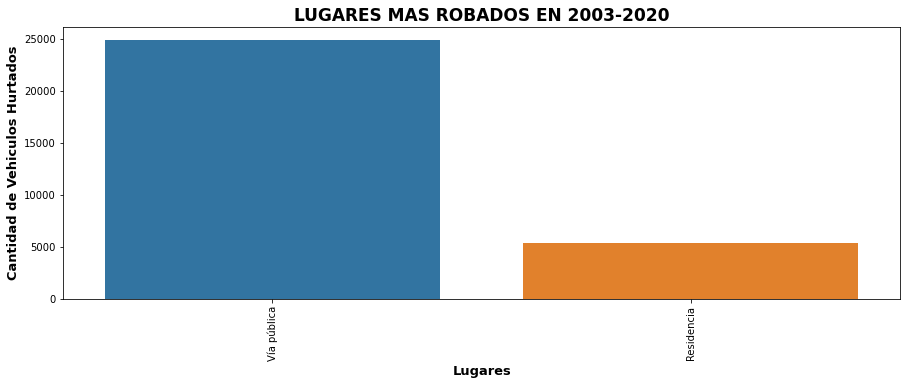

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(x=lugmr.index,y=lugmr["seguridad.cantidad"])
plt.xticks(rotation=90)
plt.title("LUGARES MAS ROBADOS EN 2003-2020",fontsize=17,fontweight="bold")
plt.xlabel("Lugares",fontsize=13,fontweight="bold")
plt.ylabel("Cantidad de Vehiculos Hurtados",fontsize=13,fontweight="bold")
plt.show()

* En el grafico anterior podemos observar como es en los espacios de la via publica en la ciudad de medellin como mas se producen hurto de vehiculos alcanzando casi unos 25.000 vehiculos durante los 17 años analizados y le sigue en las residencias el segundo lugar donde más son hurtados los vehiculos

In [10]:
carro_huratdo=len(data)
print(carro_huratdo)

36398


In [11]:
anual= carro_huratdo/17
print(anual)

2141.0588235294117


In [12]:
mensual= anual/12
print(mensual)

178.42156862745097


In [13]:
diario= mensual/30
print(diario)

5.947385620915032


Acuerdo con los analisis anteriores podemos determinar que diariamente en la ciudad de Medellin en promedio se hurtan 6 Vehiculos diarios, en diferentes sectores y diferentes tipos de modalidad.

### BARRIOS MAS ROBADOS

In [14]:
barrio_gr= data.groupby(by="seguridad.nombre_barrio").sum()

In [15]:
barrio_gr.head()

,seguridad.cantidad,seguridad.latitud,seguridad.longitud,seguridad.edad,seguridad.modelo
seguridad.nombre_barrio,,,,,
Aguas Frias,14.0,6.232721,-75.647793,457,23895
Aldea Pablo VI,2.0,12.576188,-151.082630,53,4005
Alejandro Echavarría,123.0,592.524290,-7176.875767,4401,229911
Alejandría,27.0,93.003391,-1133.532536,1012,53877
Alfonso López,134.0,634.747997,-7633.184474,4727,257639


In [16]:
barmr=barrio_gr["seguridad.cantidad"]>200

In [17]:
bh=barrio_gr[barmr].sort_values(by="seguridad.cantidad",ascending=False)

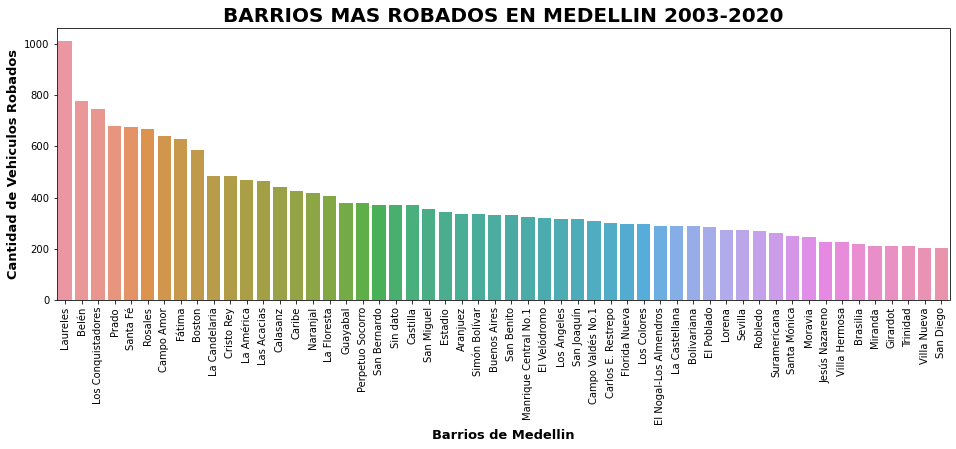

In [18]:
plt.figure(figsize=(16,5))
sns.barplot(x=bh.index,y=bh["seguridad.cantidad"])
plt.title("BARRIOS MAS ROBADOS EN MEDELLIN 2003-2020",fontsize=20,fontweight="bold")
plt.ylabel("Cantidad de Vehiculos Robados",fontsize=13,fontweight="bold")
plt.xlabel("Barrios de Medellin",fontsize=13,fontweight="bold")
plt.xticks(rotation=90)
plt.show()

* Esta Grafica nos ayudara a comprender cuales barrios han sido los mas afectados por la delicuencia en materia de hurto de Vehiculos. Podemos observar como el Baririo Laureles y Belen han sido los que mas han padecido del atraco a los automotores, donde posiblemente su causalidad pueda ser por varios factores entre estos que son barrios muy solos y son sectores de estrato medio-alto.

### MODALIDAD MAS UTILIZADA

In [19]:
modalidad= data.groupby("seguridad.modalidad").sum()

In [20]:
maul= modalidad["seguridad.cantidad"]>500

In [21]:
modmaul= modalidad[maul].sort_values("seguridad.cantidad",ascending=False)

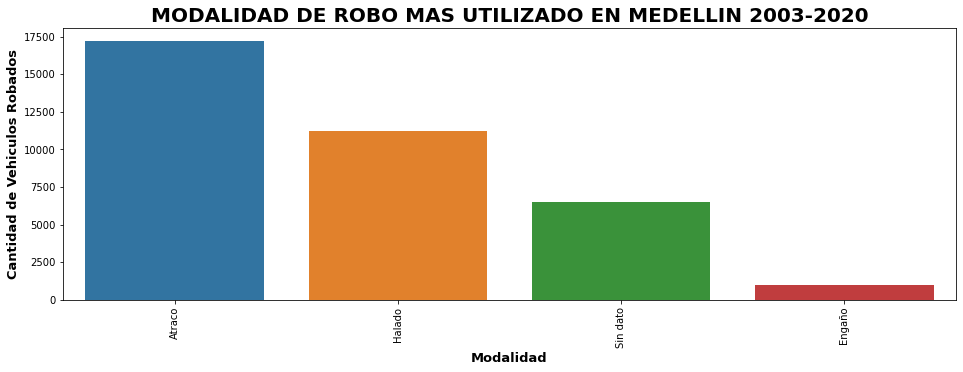

In [22]:
plt.figure(figsize=(16,5))
sns.barplot(x=modmaul.index,y=modmaul["seguridad.cantidad"])
plt.title("MODALIDAD DE ROBO MAS UTILIZADO EN MEDELLIN 2003-2020",fontsize=20,fontweight="bold")
plt.ylabel("Cantidad de Vehiculos Robados",fontsize=13,fontweight="bold")
plt.xlabel("Modalidad",fontsize=13,fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [23]:
arma= data.groupby(by="seguridad.arma_medio").sum()

In [24]:
arma

,seguridad.cantidad,seguridad.latitud,seguridad.longitud,seguridad.edad,seguridad.modelo
seguridad.arma_medio,,,,,
Arma cortopunzante,464.0,1931.631884,-2.335291e+04,17145,846972
Arma de fuego,20525.0,90994.227417,-1.100442e+06,718989,38109245
Escopolamina,159.0,812.092358,-9.824494e+03,6001,296485
Llave maestra,7354.0,38621.428795,-4.667820e+05,297775,13569156
No,1287.0,7140.222212,-8.631208e+04,49289,2174623
Objeto contundente,327.0,1526.129084,-1.844152e+04,12934,606084
Sin dato,6282.0,28836.972915,-3.485759e+05,234381,11724716


### MODELO DE LOS VEHICULOS MAS ROBADOS

In [25]:
data["fecha"]= pd.to_datetime(data["seguridad.fecha_hecho"])

In [26]:
data["year"]= data["fecha"].dt.year

In [27]:
modelo=data.groupby(by="seguridad.modelo").sum()
model=modelo[1:]

In [196]:
more= model["seguridad.cantidad"]>900

In [197]:
modelmore= model[more].sort_values(by="seguridad.cantidad",ascending=False)

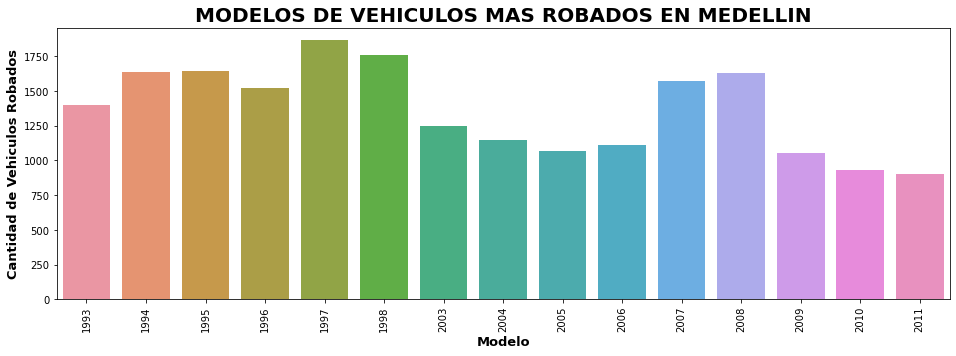

In [199]:
plt.figure(figsize=(16,5))
sns.barplot(x=modelmore.index,y=modelmore["seguridad.cantidad"])
plt.title("MODELOS DE VEHICULOS MAS ROBADOS EN MEDELLIN",fontsize=20,fontweight="bold")
plt.ylabel("Cantidad de Vehiculos Robados",fontsize=13,fontweight="bold")
plt.xlabel("Modelo",fontsize=13,fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [31]:
year= data.groupby(by="year").sum()

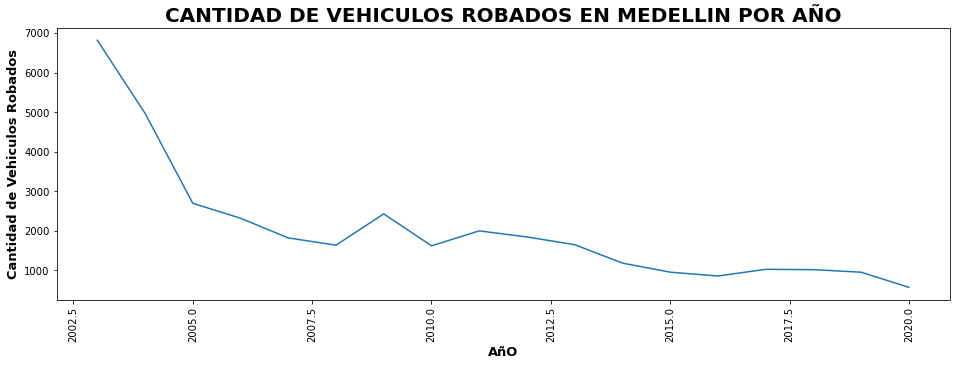

In [32]:
plt.figure(figsize=(16,5))
sns.lineplot(x=year.index,y=year["seguridad.cantidad"])
plt.title("CANTIDAD DE VEHICULOS ROBADOS EN MEDELLIN POR AÑO",fontsize=20,fontweight="bold")
plt.ylabel("Cantidad de Vehiculos Robados",fontsize=13,fontweight="bold")
plt.xlabel("AñO",fontsize=13,fontweight="bold")
plt.xticks(rotation=90)
plt.show()

* Podemos observar como desde el año 2003 el indice de robo a vehiculos a disminuido significativamente aunque yo trato de ser muy exceptico con los datos suministrados por la Alcaldia ya que se pueden estar omitiendo datos o simplemente no se recopilaron en debida forma.

## MAPA DE LA CIUDAD DE MEDELLIN CASOS POR ENGAÑO

In [33]:
data.dropna(inplace=True)

In [34]:
data.reset_index(inplace=True)

In [35]:
data["seguridad.modalidad"].unique()

array(['Halado', 'Engaño', 'Atraco', 'Descuido', 'Sin dato',
       'Llave maestra', 'Suplantación', 'Escopolamina', 'Paquete chileno',
       'Reten ilegal', 'Tóxico o agente químico', 'Miedo o terror',
       'Enfrentamiento con la fuerza pública'], dtype=object)

In [36]:
moda= data["seguridad.modalidad"]=="Engaño"

In [37]:
enga= data[moda].reset_index()

In [38]:
import folium

In [39]:
mapa= folium.Map([enga["seguridad.latitud"][0],enga["seguridad.longitud"][0]],zoom_start=12)

In [40]:
for x in range(len(enga)):
    if enga["seguridad.lugar"][x]=="Residencia":
            folium.Marker([enga["seguridad.latitud"][x],enga["seguridad.longitud"][x]],
                          tooltip=enga["seguridad.lugar"][x],
                          icon=folium.Icon(color="green",prefix="fa",icon="home")).add_to(mapa)
            
    elif enga["seguridad.lugar"][x]=="Vía pública":
            folium.Marker([enga["seguridad.latitud"][x],enga["seguridad.longitud"][x]],
                          tooltip=enga["seguridad.lugar"][x],
                          icon=folium.Icon(color="blue",prefix="fa",icon="road")).add_to(mapa)
    
    else:
        folium.Marker([enga["seguridad.latitud"][x],enga["seguridad.longitud"][x]],
                      tooltip=enga["seguridad.lugar"][x],icon=folium.Icon(color="red")).add_to(mapa)

In [41]:
mapa

En el mapa anterior podemos observar en que partes de la ciudad de Medellin se cometio el delito de hurto bajo la modalidad de engaño, tambien podemos observar en que tipo de lugar se cometio los delitos por ejemplo los puntos azules muestran aquellos que fueron cometidos en la via publica, los verdes en residencias y los rojos son varios y para conocer el lugar nos podemos ubicar encima del punto y este nos mostrara el nombre del lugar.

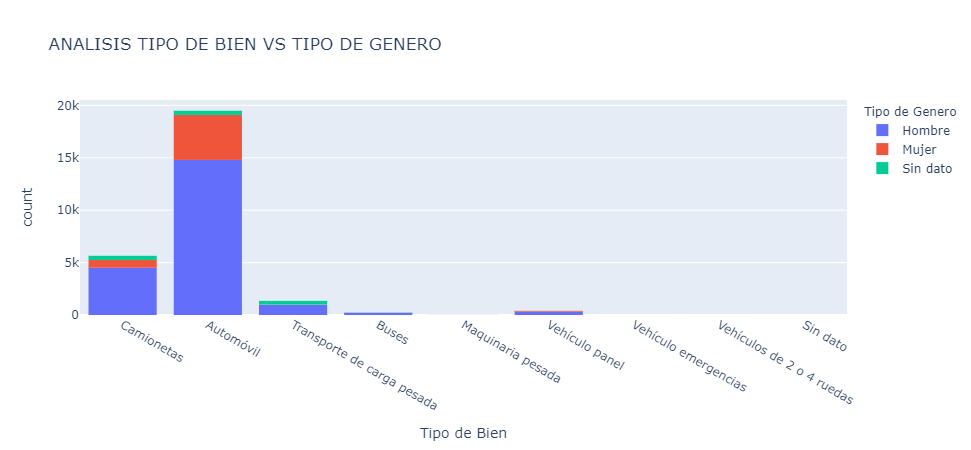

In [228]:
px.histogram(x=data["seguridad.categoria_bien"],color=data["seguridad.sexo"],labels={"x":"Tipo de Bien",
                                                                                    "color":"Tipo de Genero"},
            title="ANALISIS TIPO DE BIEN VS TIPO DE GENERO")

En el grafico anterior podemos observar cuales fueron los tipos de bien mas hurtados en la ciudad de Medellin en este caso el automovil seguido por las camionetas y a su vez podemos observar que la mayoria de las victimas de estos atracos fueron Hombres.